In [1]:
%%time
import numpy as np
import pandas as pd

Wall time: 435 ms


In [2]:
df=pd.read_csv('application_train.csv')

In [3]:
df=df.sample(n=50000, random_state=0).reset_index(drop=True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,149741,1,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,363290,0,Cash loans,M,N,Y,0,450000.0,640080.0,31261.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,436006,0,Revolving loans,M,Y,Y,0,450000.0,900000.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
3,377703,0,Cash loans,M,Y,N,1,360000.0,1125000.0,33025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,188624,0,Cash loans,M,Y,Y,0,675000.0,835380.0,42840.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,162717,0,Cash loans,M,N,N,0,202500.0,733315.5,39069.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49996,167487,0,Revolving loans,F,N,Y,0,315000.0,157500.0,7875.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0
49997,127931,0,Cash loans,M,N,Y,0,112500.0,225000.0,12915.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
49998,235316,0,Cash loans,M,N,Y,0,247500.0,755190.0,36459.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
df.drop(columns=['SK_ID_CURR'],inplace=True)

In [5]:
%%time
for c in df.dtypes[df.dtypes==object].keys():
    print('---- %s -----' %c)
    print(df[c].value_counts())

---- NAME_CONTRACT_TYPE -----
Cash loans         45188
Revolving loans     4812
Name: NAME_CONTRACT_TYPE, dtype: int64
---- CODE_GENDER -----
F      33029
M      16970
XNA        1
Name: CODE_GENDER, dtype: int64
---- FLAG_OWN_CAR -----
N    32981
Y    17019
Name: FLAG_OWN_CAR, dtype: int64
---- FLAG_OWN_REALTY -----
Y    34758
N    15242
Name: FLAG_OWN_REALTY, dtype: int64
---- NAME_TYPE_SUITE -----
Unaccompanied      40492
Family              6490
Spouse, partner     1838
Children             523
Other_B              260
Other_A              154
Group of people       41
Name: NAME_TYPE_SUITE, dtype: int64
---- NAME_INCOME_TYPE -----
Working                 25905
Commercial associate    11653
Pensioner                8910
State servant            3520
Student                     6
Unemployed                  4
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64
---- NAME_EDUCATION_TYPE -----
Secondary / secondary special    35397
Higher education                 12231
I

In [6]:
df.replace('XNA',np.nan, inplace=True)

In [7]:
numeric_features=df.dtypes[(df.dtypes==np.float64)|(df.dtypes==np.int64)].keys().tolist()
cat_features=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','EMERGENCYSTATE_MODE']

In [8]:
df=df[numeric_features+cat_features]

In [9]:
df_test=df.sample(n=10000, random_state=0)
df_train=df.drop(index=df_test.index)

df_test=df_test.reset_index(drop=True)
df_train=df_train.reset_index(drop=True)

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imp_cat=SimpleImputer(strategy='most_frequent')

In [12]:
%%time
df_train[cat_features]=imp_cat.fit_transform(df_train[cat_features])
df_test[cat_features]=imp_cat.transform(df_test[cat_features])
#заполнили пропуски

Wall time: 33.4 ms


In [13]:
df_train[cat_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,F,N,N,No
1,Revolving loans,M,Y,Y,No
2,Cash loans,M,Y,Y,No
3,Cash loans,M,Y,Y,No
4,Cash loans,F,N,Y,No


In [14]:
df_train[cat_features].isna().sum()

NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
EMERGENCYSTATE_MODE    0
dtype: int64

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
enc=OrdinalEncoder()

In [17]:
#переводим в бинарный вид
df_train[cat_features]=enc.fit_transform(df_train[cat_features])
df_test[cat_features]=enc.transform(df_test[cat_features])

In [18]:
df_train[cat_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,0.0
3,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [19]:
df[numeric_features].head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,117000.0,417024.0,20191.5,360000.0,0.020246,-21774,-2125,-4611.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,0,0,450000.0,640080.0,31261.5,450000.0,0.046220,-18499,-2055,-3052.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,450000.0,900000.0,45000.0,900000.0,0.010643,-18084,-4159,-8525.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
3,0,1,360000.0,1125000.0,33025.5,1125000.0,0.018634,-12319,-2532,-12304.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,675000.0,835380.0,42840.0,675000.0,0.020713,-10151,-2516,-2789.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [20]:
cat_bin_features=[]
for i in numeric_features:
    if len(df[i].value_counts().keys().tolist())==2:
        cat_bin_features.append(i)

In [21]:
cat_bin_features

['TARGET',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [22]:
%%time
imp_bin_cat=SimpleImputer(strategy='most_frequent')

df_train[cat_bin_features]=imp_cat.fit_transform(df_train[cat_bin_features])
df_test[cat_bin_features]=imp_cat.transform(df_test[cat_bin_features])
#заполнили пропуски наиболее частым значением

Wall time: 61 ms


In [23]:
imp_numeric=SimpleImputer(missing_values=np.nan, strategy='mean')

In [24]:
%%time

df_train[numeric_features]=imp_cat.fit_transform(df_train[numeric_features])
df_test[numeric_features]=imp_cat.transform(df_test[numeric_features])
#заполнили пропуски средним значением

Wall time: 402 ms


In [25]:
df[numeric_features]

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,117000.0,417024.0,20191.5,360000.0,0.020246,-21774,-2125,-4611.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,0,0,450000.0,640080.0,31261.5,450000.0,0.046220,-18499,-2055,-3052.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,450000.0,900000.0,45000.0,900000.0,0.010643,-18084,-4159,-8525.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
3,0,1,360000.0,1125000.0,33025.5,1125000.0,0.018634,-12319,-2532,-12304.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,675000.0,835380.0,42840.0,675000.0,0.020713,-10151,-2516,-2789.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,202500.0,733315.5,39069.0,679500.0,0.046220,-15016,-539,-923.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0,0,315000.0,157500.0,7875.0,157500.0,0.018801,-18626,-5339,-2876.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0
49997,0,0,112500.0,225000.0,12915.0,225000.0,0.020246,-14586,365243,-4916.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
49998,0,0,247500.0,755190.0,36459.0,675000.0,0.005084,-19149,-5704,-871.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
x_train=df_train.drop(columns='TARGET')
x_test=df_test.drop(columns='TARGET')

y_train=df_train['TARGET']
y_test=df_test['TARGET']

In [27]:
df_train.columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE'],
      dtype='object', length=110)

In [28]:
x_train.shape

(40000, 109)

In [29]:
x_test.shape

(10000, 109)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
standard=StandardScaler()

standard.fit(x_train)

x_train_standard=standard.transform(x_train)
x_test_standard=standard.transform(x_test)

In [32]:
x_train_standard.shape

(40000, 109)

In [33]:
x_train_standard

array([[-0.57814243, -0.50651781, -0.44939005, ..., -0.71890035,
        -1.51211795, -0.08590141],
       [-0.57814243,  2.74784058,  0.75332898, ...,  1.39101337,
         0.66132407, -0.08590141],
       [-0.57814243,  4.94673138,  0.59241063, ...,  1.39101337,
         0.66132407, -0.08590141],
       ...,
       [-0.57814243, -0.90231815, -1.36398007, ...,  1.39101337,
         0.66132407, -0.08590141],
       [-0.57814243, -0.55049562, -0.92757307, ..., -0.71890035,
         0.66132407, -0.08590141],
       [-0.57814243,  0.19712725, -0.13060138, ...,  1.39101337,
        -1.51211795, -0.08590141]])

In [34]:
x_test_standard.shape

(10000, 109)

In [35]:
from sklearn.metrics import roc_auc_score

In [36]:
roc_auc_score(y_train, [0]*len(y_train))

0.5

In [37]:
roc_auc_score(y_train, [1]*len(y_train))

0.5

In [38]:
y_train.value_counts()

0.0    36897
1.0     3103
Name: TARGET, dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logreg=LogisticRegression(max_iter=1000)

In [41]:
logreg.fit(x_train_standard, y_train)

LogisticRegression(max_iter=1000)

In [42]:
proba=logreg.predict_proba(x_test_standard)

In [46]:
proba[:]

array([[0.93035958, 0.06964042],
       [0.91994975, 0.08005025],
       [0.95863854, 0.04136146],
       ...,
       [0.9517989 , 0.0482011 ],
       [0.96296429, 0.03703571],
       [0.93639595, 0.06360405]])

In [47]:
predict=logreg.predict(x_test_standard)

In [60]:
predict()

0.0013

In [61]:
y_test

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: TARGET, Length: 10000, dtype: float64

In [60]:
roc_auc=roc_auc_score(y_test, proba[:,1])

In [45]:
roc_auc

0.7268290176937506

In [46]:
from sklearn.metrics import roc_curve

In [47]:
fpr, tpr, thresholds=roc_curve(y_test,logreg.predict_proba(x_test_standard)[:,1])

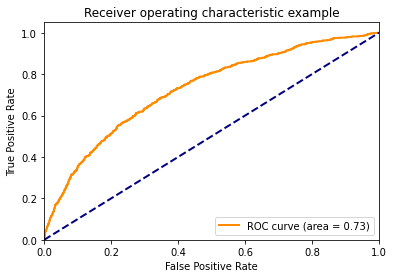

In [48]:
import matplotlib.pyplot as plt

plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [49]:
x_test_standard.shape

(10000, 109)

In [50]:
df_train.columns[1:][:10]

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'],
      dtype='object')

In [51]:
first_ten=['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

In [52]:
x_train_first_ten=df_train[first_ten]
x_test_first_ten=df_test[first_ten]

In [53]:
standard.fit(x_train_first_ten)

x_train_first_ten_standard=standard.transform(x_train_first_ten)
x_test_first_ten_standard=standard.transform(x_test_first_ten)

In [54]:
logreg.fit(x_train_first_ten_standard, y_train)

LogisticRegression(max_iter=1000)

In [55]:
proba=logreg.predict_proba(x_test_first_ten_standard)

In [56]:
proba

array([[0.91574309, 0.08425691],
       [0.93013775, 0.06986225],
       [0.93555349, 0.06444651],
       ...,
       [0.92307074, 0.07692926],
       [0.89454512, 0.10545488],
       [0.90473625, 0.09526375]])

In [57]:
roc_auc=roc_auc_score(y_test, proba[:,1])

In [58]:
roc_auc

0.6294854207567679